In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import  mean_absolute_percentage_error as MAPE
from sklearn import tree
import matplotlib.pyplot as plt
import pydotplus
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from IPython.display import clear_output
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from matplotlib import style
style.use('ggplot')

In [2]:
df = pd.read_excel('../final_data.xlsx')
df=df.iloc[:,1:]
df_org = df.copy()
df.head(3)

,Duration,Resource Cost,Fixed Cost,Cost/Hour,Variable Cost,Total Cost,Actual Cost
0,3.0,2400.0,0.0,0.0,0.0,2400.0,2400.0
1,1.0,800.0,0.0,0.0,0.0,800.0,800.0
2,1.0,440.0,0.0,0.0,0.0,440.0,440.0


In [50]:
#Standardization or Normalization
for column in df.columns:
    df[column] = MinMaxScaler().fit_transform(np.array(df[column]).reshape(-1,1))
df.head(10)

In [3]:
# setting x and y
X = df.drop('Actual Cost',axis=1)
# X = df[['Duration','Total Cost']]
y = df['Actual Cost']
# preparing test and train
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=41
)

In [14]:
def generate_metrics(model):
    cr_score = -cross_val_score(tree_regressor,X_train,y_train,scoring='neg_mean_absolute_percentage_error',cv=3)
    model.fit(X_train,y_train)
    train_r2 = model.score(X_train,y_train)
    test_r2 = model.score(X_test,y_test)
    y_pred = model.predict(X_test)
    error_MAE = MAE(y_pred,y_test)
    error_MSE = MSE(y_test,y_pred)
    error_MAPE = MAPE(y_test,y_pred)
    return cr_score,train_r2,test_r2,error_MAE,error_MSE,error_MAPE
def print_metrics(cr,tr_R,ts_R,mae,mse):
    print("Cross-Validation-Score:"+str(np.average(cr)))
    print("MAE: "+str(mae))
    print('MSE: '+str(mse))
    print("Train R2: "+ str(tr_R))
    print("Test R2: "+ str(ts_R))
def plot_mae(x,cr,mae,x_label):
    fig = plt.figure()
    plt.title('Tree HyperParameter OPT')
    plt.xlabel(x_label)
    plt.ylabel("error")
    plt.plot(x,cr,c='green',label='Cross-Val')
    plt.plot(x,mae,c='red',label='Test-MAE')
    plt.legend()
    plt.savefig('pics/'+x_label+'.png')
    plt.show()
def plot_mape(x,cr,mape,x_label):
    min_x = x[mape.index(min(mape))]
    min_y = min(mape)
    min_cr_x = x[cr.index(min(cr))]
    min_cr_y = min(cr)
    fig = plt.figure()
    plt.title('Tree HyperParameter OPT')
    plt.xlabel(x_label)
    plt.ylabel("MAPE")
    plt.plot(x,cr,c='green',label='Cross-Val')
    plt.plot(x,mape,c='red',label='Test-MAPE')
    plt.plot(min_x,min_y,'oy',markersize=12)
    plt.annotate("("+str(round(min_x,2))+', '+str(round(min_y,3))+")",xy=(min_x,min_y))
    plt.plot(min_cr_x,min_cr_y,'oy',markersize=12)
    plt.annotate("("+str(round(min_cr_x,2))+', '+str(round(min_cr_y,3))+")",xy=(min_cr_x,min_cr_y))
    plt.legend()
    plt.savefig('pics_mape/'+x_label+'.png')
    plt.show()


0.0


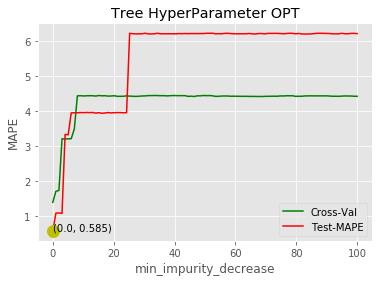

In [34]:
ccp_alpha = np.linspace(0,100,100)
max_depth = np.linspace(1,20,20,dtype=int)
min_samples_split = np.linspace(2,100,dtype=int)
min_samples_leaf = np.linspace(1,100,dtype=int)
max_features = ['auto', 'sqrt', 'log2']
max_leaf_nodes = np.linspace(1000,5000,20,dtype=int)
min_impurity_decrease = np.linspace(0,100,100)
parameter = min_impurity_decrease
parameter_name = 'min_impurity_decrease'
cr_list = []
mape_list = []
for i in parameter:
    tree_regressor = DecisionTreeRegressor(
        min_impurity_decrease=i,
        random_state=41)
    cr,tr_R,ts_R,mae,mse,mape = generate_metrics(tree_regressor)
    cr_list.append(np.average(cr))
    mape_list.append(mape)
print(parameter[mape_list.index(min(mape_list))])
plot_mape(parameter,cr_list,mape_list,x_label=parameter_name)
# ----------------------------- for single usage
# cr,tr_R,ts_R,mae,mse = generate_metrics(tree_regressor)
# print_metrics(cr,tr_R,ts_R,mae,mse)
# -----------------------------

### Base Model (with no hyper parameters)
Cross-Validation-Score:7087.853890255971 <br>
MAE: 8194.332009158503 <br>
MSE: 1310403929.046806 <br>
Train R2: 0.9984405456569931 <br>
Test R2: 0.6715758197834594 <br>
#### BEST MAX DEPTH = 7 <br>
#### BEST min_samples_split = 0.006 <br>
#### BEST min_samples_leaf = 0.004
#### BEST max_leaf_nodes = 49
#### BEST min_impurity_decrease = 34.6
#### BEST splitter = random
#### BEST max_features = sqrt
#### BEST ccp_alpha = 13434
### Model After Exploratory Parameter Tuning
Cross-Validation-Score:20940.862282131988 <br>
MAE: 18995.667954555534 <br>
MSE: 1501197758.7096622 <br>
Train R2: 0.6320352403305758 <br>
Test R2: 0.62375750536267 <br>
### Final Model
'ccp_alpha': 13434, <br>
'max_depth': 7,<br>
'max_features': 'auto',<br>
'max_leaf_nodes': 48,<br>
'min_impurity_decrease': 0,<br>
'min_samples_leaf': 1,<br>
'min_samples_split': 0.005,<br>
'splitter': 'random'
#### with two attrs
Cross-Validation-Score:6993.424569760234 <br>
MAE: 5942.955577700336 <br>
MSE: 352654781.24830395 <br>
Train R2: 0.9051753291112914 <br>
Test R2: 0.9372154037633127 <br>
#### with full attrs
Cross-Validation-Score:7544.451049013391
MAE: 7839.9115567135395
MSE: 921507622.8550984
Train R2: 0.9134290469474539
Test R2: 0.8504812921161993


## Trying to find the best hyper paramteters

In [38]:
# Randomized Search
splitter = ['best','random']
max_depth=[None,5,6,7,8,10]
min_samples_split=[2,0.006,0.007,0.005]
min_samples_leaf = [1,0.004,0.003,0.002]
max_features = ['auto','sqrt']
max_leaf_nodes = [None,49,50,48]
ccp_alpha = [0,13434,15000,10000]
min_impurity_decrease = [0,34.6]
random_state = [41]
random_grid = {
    'splitter':splitter,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'max_leaf_nodes':max_leaf_nodes,
    'ccp_alpha':ccp_alpha,
    'min_impurity_decrease':min_impurity_decrease,
    'random_state':random_state
    }
tree_regressor = DecisionTreeRegressor(random_state=41)
random_search = RandomizedSearchCV(
    estimator=tree_regressor,
    param_distributions=random_grid,
    n_iter=1000,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2,
    scoring='neg_mean_absolute_error')
random_search.fit(X_train,y_train)
print("done")

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
done


In [40]:
# Grid Search
splitter = ['best']
max_depth=[None,17,18,19]
min_samples_split=[2,3,4]
min_samples_leaf = [1,2,3]
max_features = ['auto']
max_leaf_nodes = [None,2052]
ccp_alpha = [0]
min_impurity_decrease = [0]
random_state = [41]
search_grid = {
    'splitter':splitter,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'max_leaf_nodes':max_leaf_nodes,
    'ccp_alpha':ccp_alpha,
    'min_impurity_decrease':min_impurity_decrease,
    'random_state':random_state
}
tree_regressor = DecisionTreeRegressor()
search = GridSearchCV(
    estimator=tree_regressor,
    param_grid=search_grid,
    cv=3,
    n_jobs=-3,
    verbose=2,
    scoring='neg_mean_absolute_percentage_error')
search.fit(X_train,y_train)
print("done")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
done


In [43]:
search.best_params_

{'ccp_alpha': 0,
 'max_depth': 19,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 41,
 'splitter': 'best'}

In [45]:
y_pred = search.best_estimator_.predict(X_test)
MAPE(y_pred,y_test)

0.560076163818866

#FINAL MODEL

In [46]:
mae = []
mape = []
mse = []
for i in range(1,20):
    print('****'+str(i)+'****')
    X = df.drop('Actual Cost',axis=1)
    y = df['Actual Cost']
    X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=0.2)
    tree_regressor = search.best_estimator_
    tree_regressor.fit(X_train,y_train)
    y_pred = tree_regressor.predict(X_test)
    mae.append(MAE(y_test,y_pred))
    mse.append(MSE(y_test,y_pred))
    mape.append(MAPE(y_test,y_pred))
    clear_output(wait=True)
print(np.average(mae))
print(np.average(mse))
print(np.average(mape))


6020.316669812966
516692090.33566046
1.005864773554262


the mean mae after running for 100 times: 6676.626301399859

In [47]:
MAE_MSP = MAE(df['Actual Cost'],df['Total Cost'])
print("MAE MSP:")
print(MAE_MSP)
MSE_MSP = MSE(df['Actual Cost'],df['Total Cost'])
print("MSE MSP:")
print(MSE_MSP)
print("MAPE MSP: ")
print(MAPE(df['Actual Cost'],df['Total Cost']))

MAE MSP:
3864.3625628316436
MSE MSP:
350210683.9717696
MAPE MSP: 
0.741589091679601


In [29]:
# Saving Tree Graph
dot_data = tree.export_graphviz(tree_regressor, out_file=None, 
                                feature_names=['Duration','Total Cost'],class_names=['Acutal Cost'])
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_svg("tree.svg")

In [30]:
# Saving model
pkl_filename = "tree.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tree_regressor, file)

In [9]:
pkl_filename = "tree.pkl"
with open(pkl_filename,'rb') as file:
    model = pickle.load(file)
print("MODEL IMPORTED!")
